In [831]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('seaborn-whitegrid')

In [832]:
# magic to reload modules automatically
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [833]:
ff = pd.read_csv('data/5factors.csv')
rt = pd.read_excel('data/north.xlsx' , skiprows=3)
esg = pd.read_excel('data/north31.xlsx', skiprows=3)
print(rt.shape)
print(esg.shape)
print(ff.shape)

(2352, 124)
(12, 739)
(8261, 7)


In [834]:
pd.set_option('display.max_columns',735) # I want to see all the columns
pd.set_option('display.max_rows',735) 

In [835]:
rt.drop(index=[0,1,2], inplace=True)
rt.reset_index(inplace = True, drop = True) # Drop old index too

In [836]:
rt.rename(columns={'Unnamed: 0':'date'},inplace = True) 
xx = ['1COV GY Equity','DTG GY Equity','SINCH SS Equity',
                 'SHL GY Equity','NEL NO Equity','DHER GY Equity',
                 'HFG GY Equity','LIN GY Equity','NETS DC Equity',
                 'DAX Index','OMXS30B Index','OMXC25 Index','OMX Index']
drop_these = []
for i in xx:
    for j in range(1,6):
        drop_these.append(i + '.' + str(j))
drop_these = xx + drop_these
rt.drop(columns=xx, inplace = True)

In [837]:
rt.columns = rt.columns.str.replace(' GY', ' G')
rt.columns = rt.columns.str.replace(' SS', ' S')
rt.columns = rt.columns.str.replace(' NO', ' N')
rt.columns = rt.columns.str.replace(' DC', ' D')
rt.columns = rt.columns.str.replace(' Equity', '')
rt.columns = rt.columns.str.replace(' ', '_')

In [838]:
# stupid and long code creating colomn 'year' =)
rt['y'] = str(rt['date'])
tt = rt['y'].str.split('-', expand=True)
tt = tt[0]
rt['ye'] = tt
ttt = rt['ye'].str.split(' ', expand=True)
rt['year'] = ttt[7]
rt.drop(columns=['y','ye'], inplace = True) 

In [839]:
rt['date'] = pd.to_datetime(rt['date'])
rt.set_index('date',inplace = True) 

In [840]:
# I don't want to have any observation for given asset for given year 
# if there are some NaN for that year
for i in rt.columns:
    if rt.loc['2013-01-01': '2013-12-31', i].isnull().sum() > 0:
        rt.loc['2013-01-01': '2013-12-31', i] = float('NaN') 
        
for i in rt.columns:
    if rt.loc['2014-01-01': '2014-12-31', i].isnull().sum() > 0:
        rt.loc['2014-01-01': '2014-12-31', i] = float('NaN') 
        
for i in rt.columns:
    if rt.loc['2015-01-01': '2015-12-31', i].isnull().sum() > 0:
        rt.loc['2015-01-01': '2015-12-31', i] = float('NaN')    
        
for i in rt.columns:
    if rt.loc['2016-01-01': '2016-12-31', i].isnull().sum() > 0:
        rt.loc['2016-01-01': '2016-12-31', i] = float('NaN')    
        
for i in rt.columns:
    if rt.loc['2017-01-01': '2017-12-31', i].isnull().sum() > 0:
        rt.loc['2017-01-01': '2017-12-31', i] = float('NaN')  

In [841]:
rt.loc['2018-01-01': '2018-12-31'].isnull().values.any()

False

In [842]:
esg.drop(columns=drop_these,inplace = True) 
esg.drop(index=[0,2], inplace=True)
esg.rename(columns={'Unnamed: 0':'Date'},inplace = True) 
esg.reset_index(inplace = True, drop = True) 

In [843]:
esg.replace({'ESG_DISCLOSURE_SCORE': 'ESG', 'ENVIRON_DISCLOSURE_SCORE': 'E',
             'SOCIAL_DISCLOSURE_SCORE': 'S','GOVNCE_DISCLOSURE_SCORE': 'G',
             'HISTORICAL_MARKET_CAP' : 'HMCAP', 'CUR_MKT_CAP': 'MCAP'}, inplace=True)

In [844]:
asg = esg.iloc[1] + ' ' + esg.iloc[0]
esg = esg.append(asg, ignore_index=True)
esg.loc[10,'Date'] = 'date'
nnn = esg.loc[10]
esg.rename(columns=nnn, inplace=True)
esg.drop(index=[0,1,10], inplace=True)
esg.reset_index(inplace = True, drop = True)

In [845]:
esg.columns = esg.columns.str.replace(' GY', ' G')
esg.columns = esg.columns.str.replace(' SS', ' S')
esg.columns = esg.columns.str.replace(' NO', ' N')
esg.columns = esg.columns.str.replace(' DC', ' D')
esg.columns = esg.columns.str.replace(' Equity', '')
esg.columns = esg.columns.str.replace(' ', '_')
esg.set_index('date', inplace=True)

In [846]:
year_sc = list(esg.index)

mg_esg = []
for i in esg.index:
    mg_esg.append(esg.loc[i, 'ADS_G_ESG' : 'ZAL_G_ESG'].mean())
    
mg_e = []
for i in esg.index:
    mg_e.append(esg.loc[i, 'ADS_G_E' : 'ZAL_G_E'].mean())

mg_s = []
for i in esg.index:
    mg_s.append(esg.loc[i, 'ADS_G_S' : 'ZAL_G_S'].mean())

mg_g = []
for i in esg.index:
    mg_g.append(esg.loc[i, 'ADS_G_G' : 'ZAL_G_G'].mean())
  
ms_esg = []
for i in esg.index:
    ms_esg.append(esg.loc[i, 'ABB_S_ESG' : 'VOLVB_S_ESG'].mean())
    
ms_e = []
for i in esg.index:
    ms_e.append(esg.loc[i, 'ABB_S_E' : 'VOLVB_S_E'].mean())

ms_s = []
for i in esg.index:
    ms_s.append(esg.loc[i, 'ABB_S_S' : 'VOLVB_S_S'].mean())

ms_g = []
for i in esg.index:
    ms_g.append(esg.loc[i, 'ABB_S_G' : 'VOLVB_S_G'].mean())
    
mn_esg = []
for i in esg.index:
    mn_esg.append(esg.loc[i, 'AKER_N_ESG' : 'STB_N_ESG'].mean())
    
mn_e = []
for i in esg.index:
    mn_e.append(esg.loc[i, 'AKER_N_E' : 'STB_N_E'].mean())

mn_s = []
for i in esg.index:
    mn_s.append(esg.loc[i, 'AKER_N_S' : 'STB_N_S'].mean())

mn_g = []
for i in esg.index:
    mn_g.append(esg.loc[i, 'AKER_N_G' : 'STB_N_G'].mean())

md_esg = []
for i in esg.index:
    md_esg.append(esg.loc[i, 'AMBUB_D_ESG' : 'VWS_D_ESG'].mean())
    
md_e = []
for i in esg.index:
    md_e.append(esg.loc[i, 'AMBUB_D_E' : 'VWS_D_E'].mean())

md_s = []
for i in esg.index:
    md_s.append(esg.loc[i, 'AMBUB_D_S' : 'VWS_D_S'].mean())

md_g = []
for i in esg.index:
    md_g.append(esg.loc[i, 'AMBUB_D_G' : 'VWS_D_G'].mean())

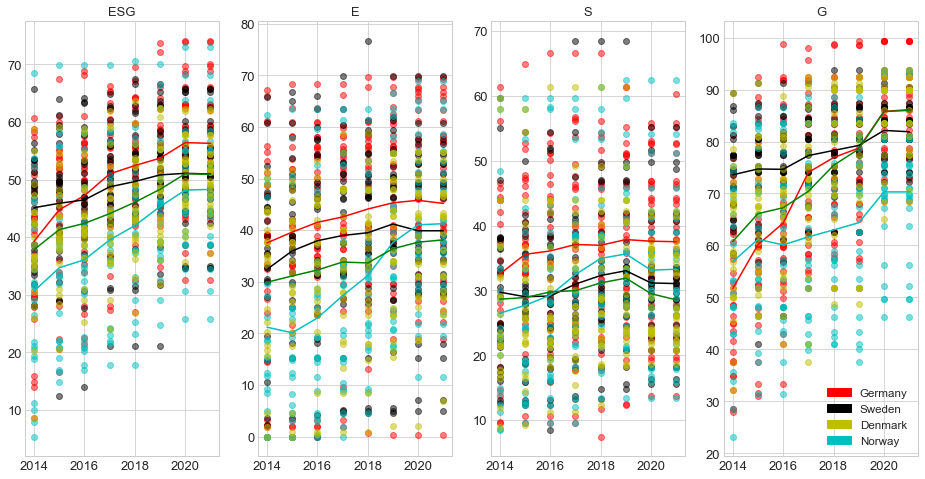

In [847]:
fig = plt.figure(figsize=(16, 8))
plt.rcParams['font.size'] = '13' # Set general font size

ax1 = fig.add_subplot(1,4,1)

ax1.plot(esg.loc[:, 'ADS_G_ESG' : 'ZAL_G_ESG'], 'o',color='r', alpha=0.5)
ax1.plot(esg.loc[:, 'ABB_S_ESG' : 'VOLVB_S_ESG'], 'o', color='k',alpha=0.5)
ax1.plot(esg.loc[:, 'AKER_N_ESG' : 'STB_N_ESG'], 'o', color='c',alpha=0.5)
ax1.plot(esg.loc[:, 'AMBUB_D_ESG' : 'VWS_D_ESG'], 'o',color='y', alpha=0.5)
ax1.plot(year_sc,mg_esg, color='r')
ax1.plot(year_sc,ms_esg, color='k')
ax1.plot(year_sc,mn_esg, color='c')
ax1.plot(year_sc,md_esg, color='g')
ax1.set_title('ESG',fontsize=13)

ax2 = fig.add_subplot(1,4,2)

ax2.plot(esg.loc[:, 'ADS_G_E' : 'ZAL_G_E'], 'o',color='r', alpha=0.5)
ax2.plot(esg.loc[:, 'ABB_S_E' : 'VOLVB_S_E'], 'o', color='k',alpha=0.5)
ax2.plot(esg.loc[:, 'AKER_N_E' : 'STB_N_E'], 'o', color='c',alpha=0.5)
ax2.plot(esg.loc[:, 'AMBUB_D_E' : 'VWS_D_E'], 'o',color='y', alpha=0.5)
ax2.plot(year_sc,mg_e, color='r')
ax2.plot(year_sc,ms_e, color='k')
ax2.plot(year_sc,mn_e, color='c')
ax2.plot(year_sc,md_e, color='g')
ax2.set_title('E',fontsize=13)

ax3 = fig.add_subplot(1,4,3)

ax3.plot(esg.loc[:, 'ADS_G_S' : 'ZAL_G_S'], 'o',color='r', alpha=0.5)
ax3.plot(esg.loc[:, 'ABB_S_S' : 'VOLVB_S_S'], 'o', color='k',alpha=0.5)
ax3.plot(esg.loc[:, 'AKER_N_S' : 'STB_N_S'], 'o', color='c',alpha=0.5)
ax3.plot(esg.loc[:, 'AMBUB_D_S' : 'VWS_D_S'], 'o',color='y', alpha=0.5)
ax3.plot(year_sc,mg_s, color='r')
ax3.plot(year_sc,ms_s, color='k')
ax3.plot(year_sc,mn_s, color='c')
ax3.plot(year_sc,md_s, color='g')
ax3.set_title('S',fontsize=13)

ax4 = fig.add_subplot(1,4,4)

ax4.plot(esg.loc[:, 'ADS_G_G' : 'ZAL_G_G'], 'o',color='r', alpha=0.5)
ax4.plot(esg.loc[:, 'ABB_S_G' : 'VOLVB_S_G'], 'o', color='k',alpha=0.5)
ax4.plot(esg.loc[:, 'AKER_N_G' : 'STB_N_G'], 'o', color='c',alpha=0.5)
ax4.plot(esg.loc[:, 'AMBUB_D_G' : 'VWS_D_G'], 'o',color='y', alpha=0.5)
ax4.plot(year_sc,mg_g, color='r')
ax4.plot(year_sc,ms_g, color='k')
ax4.plot(year_sc,mn_g, color='c')
ax4.plot(year_sc,md_g, color='g')
ax4.set_title('G',fontsize=13)

# Code creating manual legends
r_patch = mpatches.Patch(color='r', label='Germany')
k_patch = mpatches.Patch(color='k', label='Sweden')
c_patch = mpatches.Patch(color='c', label='Norway')
y_patch = mpatches.Patch(color='y', label='Denmark')
ax4.legend(handles=[r_patch,k_patch,y_patch,c_patch],prop={'size': 11.6})
plt.savefig('scores.png');

In [848]:
#esg_da =[]
#for i in range(2014, 2021+1):
    #esg_da.append(str(i) + '-' + str('01') + '-' + str('01'))
#esg['date'] = esg_da
#esg['date'] = pd.to_datetime(esg['date'])

In [849]:
esg.head(20)

,ADS_G_ESG,AIR_G_ESG,ALV_G_ESG,BAS_G_ESG,BAYN_G_ESG,BMW_G_ESG,BNR_G_ESG,CON_G_ESG,DB1_G_ESG,DBK_G_ESG,DPW_G_ESG,DTE_G_ESG,EOAN_G_ESG,FME_G_ESG,FRE_G_ESG,HEI_G_ESG,HEN3_G_ESG,HNR1_G_ESG,IFX_G_ESG,MBG_G_ESG,MRK_G_ESG,MTX_G_ESG,MUV2_G_ESG,PAH3_G_ESG,PUM_G_ESG,QIA_G_ESG,RWE_G_ESG,SAP_G_ESG,SIE_G_ESG,SRT3_G_ESG,SY1_G_ESG,VNA_G_ESG,VOW3_G_ESG,ZAL_G_ESG,ABB_S_ESG,ALFA_S_ESG,ALIV_S_ESG,ASSAB_S_ESG,ATCOA_S_ESG,ATCOB_S_ESG,AZN_S_ESG,BOL_S_ESG,ELUXB_S_ESG,ERICB_S_ESG,ESSITYB_S_ESG,EVO_S_ESG,GETIB_S_ESG,HEXAB_S_ESG,HMB_S_ESG,INVEB_S_ESG,KINVB_S_ESG,NDA_S_ESG,SAND_S_ESG,SCAB_S_ESG,SEBA_S_ESG,SHBA_S_ESG,SKAB_S_ESG,SKFB_S_ESG,SWEDA_S_ESG,SWMA_S_ESG,TEL2B_S_ESG,TELIA_S_ESG,VOLVB_S_ESG,AKER_N_ESG,AKRBP_N_ESG,BAKKA_N_ESG,BWLPG_N_ESG,BWO_N_ESG,DNB_N_ESG,DNO_N_ESG,ENTRA_N_ESG,EQNR_N_ESG,FRO_N_ESG,GJF_N_ESG,LSG_N_ESG,MOWI_N_ESG,NHY_N_ESG,ORK_N_ESG,SALM_N_ESG,SCHA_N_ESG,SUBC_N_ESG,TEL_N_ESG,TOM_N_ESG,TGS_N_ESG,YAR_N_ESG,STB_N_ESG,AMBUB_D_ESG,MAERSKA_D_ESG,MAERSKB_D_ESG,BAVA_D_ESG,CARLB_D_ESG,CHR_D_ESG,COLOB_D_ESG,DANSKE_D_ESG,DEMANT_D_ESG,DSV_D_ESG,FLS_D_ESG,GMAB_D_ESG,GN_D_ESG,ISS_D_ESG,LUN_D_ESG,NOVOB_D_ESG,NZYMB_D_ESG,ORSTED_D_ESG,PNDORA_D_ESG,ROCKB_D_ESG,RBREW_D_ESG,SIM_D_ESG,TRYG_D_ESG,VWS_D_ESG,ADS_G_E,AIR_G_E,ALV_G_E,BAS_G_E,BAYN_G_E,BMW_G_E,BNR_G_E,CON_G_E,DB1_G_E,DBK_G_E,DPW_G_E,DTE_G_E,EOAN_G_E,FME_G_E,FRE_G_E,HEI_G_E,HEN3_G_E,HNR1_G_E,IFX_G_E,MBG_G_E,MRK_G_E,MTX_G_E,MUV2_G_E,PAH3_G_E,PUM_G_E,QIA_G_E,RWE_G_E,SAP_G_E,SIE_G_E,SRT3_G_E,SY1_G_E,VNA_G_E,VOW3_G_E,ZAL_G_E,ABB_S_E,ALFA_S_E,ALIV_S_E,ASSAB_S_E,ATCOA_S_E,ATCOB_S_E,AZN_S_E,BOL_S_E,ELUXB_S_E,ERICB_S_E,ESSITYB_S_E,EVO_S_E,GETIB_S_E,HEXAB_S_E,HMB_S_E,INVEB_S_E,KINVB_S_E,NDA_S_E,SAND_S_E,SCAB_S_E,SEBA_S_E,SHBA_S_E,SKAB_S_E,SKFB_S_E,SWEDA_S_E,SWMA_S_E,TEL2B_S_E,TELIA_S_E,VOLVB_S_E,AKER_N_E,AKRBP_N_E,BAKKA_N_E,BWLPG_N_E,BWO_N_E,DNB_N_E,DNO_N_E,ENTRA_N_E,EQNR_N_E,FRO_N_E,GJF_N_E,LSG_N_E,MOWI_N_E,NHY_N_E,ORK_N_E,SALM_N_E,SCHA_N_E,SUBC_N_E,TEL_N_E,TOM_N_E,TGS_N_E,YAR_N_E,STB_N_E,AMBUB_D_E,MAERSKA_D_E,MAERSKB_D_E,BAVA_D_E,CARLB_D_E,CHR_D_E,COLOB_D_E,DANSKE_D_E,DEMANT_D_E,DSV_D_E,FLS_D_E,GMAB_D_E,GN_D_E,ISS_D_E,LUN_D_E,NOVOB_D_E,NZYMB_D_E,ORSTED_D_E,PNDORA_D_E,ROCKB_D_E,RBREW_D_E,SIM_D_E,TRYG_D_E,VWS_D_E,ADS_G_S,AIR_G_S,ALV_G_S,BAS_G_S,BAYN_G_S,BMW_G_S,BNR_G_S,CON_G_S,DB1_G_S,DBK_G_S,DPW_G_S,DTE_G_S,EOAN_G_S,FME_G_S,FRE_G_S,HEI_G_S,HEN3_G_S,HNR1_G_S,IFX_G_S,MBG_G_S,MRK_G_S,MTX_G_S,MUV2_G_S,PAH3_G_S,PUM_G_S,QIA_G_S,RWE_G_S,SAP_G_S,SIE_G_S,SRT3_G_S,SY1_G_S,VNA_G_S,VOW3_G_S,ZAL_G_S,ABB_S_S,ALFA_S_S,ALIV_S_S,ASSAB_S_S,ATCOA_S_S,ATCOB_S_S,AZN_S_S,BOL_S_S,ELUXB_S_S,ERICB_S_S,ESSITYB_S_S,EVO_S_S,GETIB_S_S,HEXAB_S_S,HMB_S_S,INVEB_S_S,KINVB_S_S,NDA_S_S,SAND_S_S,SCAB_S_S,SEBA_S_S,SHBA_S_S,SKAB_S_S,SKFB_S_S,SWEDA_S_S,SWMA_S_S,TEL2B_S_S,TELIA_S_S,VOLVB_S_S,AKER_N_S,AKRBP_N_S,BAKKA_N_S,BWLPG_N_S,BWO_N_S,DNB_N_S,DNO_N_S,ENTRA_N_S,EQNR_N_S,FRO_N_S,GJF_N_S,LSG_N_S,MOWI_N_S,NHY_N_S,ORK_N_S,SALM_N_S,SCHA_N_S,SUBC_N_S,TEL_N_S,TOM_N_S,TGS_N_S,YAR_N_S,STB_N_S,AMBUB_D_S,MAERSKA_D_S,MAERSKB_D_S,BAVA_D_S,CARLB_D_S,CHR_D_S,COLOB_D_S,DANSKE_D_S,DEMANT_D_S,DSV_D_S,FLS_D_S,GMAB_D_S,GN_D_S,ISS_D_S,LUN_D_S,NOVOB_D_S,NZYMB_D_S,ORSTED_D_S,PNDORA_D_S,ROCKB_D_S,RBREW_D_S,SIM_D_S,TRYG_D_S,VWS_D_S,ADS_G_G,AIR_G_G,ALV_G_G,BAS_G_G,BAYN_G_G,BMW_G_G,BNR_G_G,CON_G_G,DB1_G_G,DBK_G_G,DPW_G_G,DTE_G_G,EOAN_G_G,FME_G_G,FRE_G_G,HEI_G_G,HEN3_G_G,HNR1_G_G,IFX_G_G,MBG_G_G,MRK_G_G,MTX_G_G,MUV2_G_G,PAH3_G_G,PUM_G_G,QIA_G_G,RWE_G_G,SAP_G_G,SIE_G_G,SRT3_G_G,SY1_G_G,VNA_G_G,VOW3_G_G,ZAL_G_G,ABB_S_G,ALFA_S_G,ALIV_S_G,ASSAB_S_G,ATCOA_S_G,ATCOB_S_G,AZN_S_G,BOL_S_G,ELUXB_S_G,ERICB_S_G,ESSITYB_S_G,EVO_S_G,GETIB_S_G,HEXAB_S_G,HMB_S_G,INVEB_S_G,KINVB_S_G,NDA_S_G,SAND_S_G,SCAB_S_G,SEBA_S_G,SHBA_S_G,SKAB_S_G,SKFB_S_G,SWEDA_S_G,SWMA_S_G,TEL2B_S_G,TELIA_S_G,VOLVB_S_G,AKER_N_G,AKRBP_N_G,BAKKA_N_G,BWLPG_N_G,BWO_N_G,DNB_N_G,DNO_N_G,ENTRA_N_G,EQNR_N_G,FRO_N_G,GJF_N_G,LSG_N_G,MOWI_N_G,NHY_N_G,ORK_N_G,SALM_N_G,SCHA_N_G,SUBC_N_G,TEL_N_G,TOM_N_G,TGS_N_G,YAR_N_G,STB_N_G,AMBUB_D_G,MAERSKA_D_G,MAERSKB_D_G,BAVA_D_G,CARLB_D_G,CHR_D_G,COLOB_D_G,DANSKE_D_G,DEMANT_D_G,DSV_D_

In [850]:
mg_esg_q = []
for i in esg.index:
    mg_esg_q.append(esg.loc[i, 'ADS_G_ESG' : 'ZAL_G_ESG'].quantile(q=0.33))
print(mg_esg_q)
mg_esg_q1 = []
for i in esg.index:
    mg_esg_q1.append(esg.loc[i, 'ADS_G_ESG' : 'ZAL_G_ESG'].quantile(q=0.66))
print(mg_esg_q1)

[34.108803, 41.968049, 44.487103000000005, 48.829542, 50.288636000000004, 49.584115999999995, 53.818472, 53.818472]
[45.594432000000005, 51.744922, 53.112794, 55.134694, 56.226312, 58.081864, 61.787164000000004, 59.417602]


In [851]:
esg.loc['2014', 'ADS_G_ESG' : 'ZAL_G_ESG']
esg[I]

KeyError: '2014'